### Load Data

In [1]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

### Check a review

In [3]:
# Convert numbered review to actual review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Vectorize input data and labels

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [5]:
print(train_labels.shape)
train_labels

(25000,)


array([1, 0, 0, ..., 0, 1, 0])

In [6]:
print(test_labels.shape)
test_labels

(25000,)


array([0, 1, 1, ..., 0, 0, 0])

### Distribution

12500


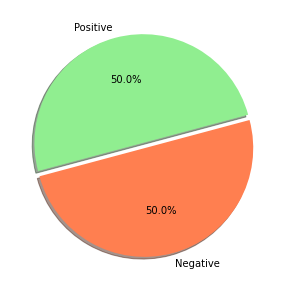

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(5,5))
colors = ["lightgreen",'coral']
pos = 0
neg = 0
for x in train_labels:
  if x==0:
      neg=neg+1
  else:
      pos=pos+1
ck=[]
ck.append(pos)
ck.append(neg)
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 15,
                 explode=(0, 0.05))
print(pos)

In [8]:
print(X_train.shape)
X_train

(25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [10]:
print(y_test.shape)
y_test


(25000,)


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [11]:
from keras import models
from keras import layers

In [12]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics

In [13]:
# Input for Validation
X_val = X_train[:5000]
partial_X_train = X_train[5000:]

# Labels for validation
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

### Training Model

In [14]:
trainingLoss = {}
from ADAM import ADAM

def trainDifOptimizer(optmzr):
    # torch.manual_seed(seed)
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = getattr(optimizers,"Adam")(lr=0.01) 
    else:
      optimizer = getattr(optimizers, optmzr)(lr=0.01)
    model.compile(optimizer=optimizer,
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])
    n_epochs = 15 

    trainLossForOptimizer = []
    print("\n-----------------------------------------\n")
    print("Optimizer : ", optmzr, "\n")
    history = model.fit(partial_X_train,
                partial_y_train,
                epochs=15,
                batch_size=100,
                validation_data=(X_val, y_val))

    trainingLoss[optmzr] = history.history['loss']
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam_scratch','RMSprop','Adam', 'SGD','Adadelta']
for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)

print(trainingLoss)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



-----------------------------------------

Optimizer :  Adam_scratch 

Epoch 1/15
200/200 [==============================] - 3s 12ms/step - loss: 0.3287 - binary_accuracy: 0.8593 - val_loss: 0.2813 - val_binary_accuracy: 0.8828
Epoch 2/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1682 - binary_accuracy: 0.9344 - val_loss: 0.3127 - val_binary_accuracy: 0.8798
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1038 - binary_accuracy: 0.9582 - val_loss: 0.4218 - val_binary_accuracy: 0.8690
Epoch 4/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0719 - binary_accuracy: 0.9707 - val_loss: 0.4766 - val_binary_accuracy: 0.8708
Epoch 5/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0489 - binary_accuracy: 0.9808 - val_loss: 0.6401 - val_binary_accuracy: 0.8696
Epoch 6/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0442 - binary_accuracy: 0.9837 - val_loss: 0.6605 - val_binary_acc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
200/200 [==============================] - 3s 12ms/step - loss: 0.3716 - binary_accuracy: 0.8338 - val_loss: 0.2756 - val_binary_accuracy: 0.8906
Epoch 2/15
200/200 [==============================] - 2s 11ms/step - loss: 0.2046 - binary_accuracy: 0.9208 - val_loss: 0.2970 - val_binary_accuracy: 0.8852
Epoch 3/15
200/200 [==============================] - 2s 11ms/step - loss: 0.1514 - binary_accuracy: 0.9437 - val_loss: 0.3625 - val_binary_accuracy: 0.8808
Epoch 4/15
200/200 [==============================] - 2s 11ms/step - loss: 0.1075 - binary_accuracy: 0.9611 - val_loss: 0.4426 - val_binary_accuracy: 0.8816
Epoch 5/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0782 - binary_accuracy: 0.9714 - val_loss: 0.5443 - val_binary_accuracy: 0.8794
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0603 - binary_accuracy: 0.9791 - val_loss: 0.6490 - val_binary_accuracy: 0.8762
Epoch 7/15
200/200 [==============================] - 2s 1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
200/200 [==============================] - 3s 11ms/step - loss: 0.6756 - binary_accuracy: 0.6022 - val_loss: 0.6474 - val_binary_accuracy: 0.7002
Epoch 2/15
200/200 [==============================] - 2s 10ms/step - loss: 0.5944 - binary_accuracy: 0.7761 - val_loss: 0.5519 - val_binary_accuracy: 0.7816
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.4911 - binary_accuracy: 0.8213 - val_loss: 0.4573 - val_binary_accuracy: 0.8184
Epoch 4/15
200/200 [==============================] - 2s 10ms/step - loss: 0.4098 - binary_accuracy: 0.8447 - val_loss: 0.3973 - val_binary_accuracy: 0.8366
Epoch 5/15
200/200 [==============================] - 2s 10ms/step - loss: 0.3580 - binary_accuracy: 0.8590 - val_loss: 0.3628 - val_binary_accuracy: 0.8506
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.3248 - binary_accuracy: 0.8713 - val_loss: 0.3417 - val_binary_accuracy: 0.8606
Epoch 7/15
200/200 [==============================] - 2s 1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


Epoch 1/15
200/200 [==============================] - 3s 11ms/step - loss: 0.6879 - binary_accuracy: 0.5626 - val_loss: 0.6851 - val_binary_accuracy: 0.5888
Epoch 2/15
200/200 [==============================] - 2s 10ms/step - loss: 0.6784 - binary_accuracy: 0.6256 - val_loss: 0.6740 - val_binary_accuracy: 0.6540
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.6646 - binary_accuracy: 0.6886 - val_loss: 0.6590 - val_binary_accuracy: 0.7020
Epoch 4/15
200/200 [==============================] - 2s 10ms/step - loss: 0.6472 - binary_accuracy: 0.7327 - val_loss: 0.6411 - val_binary_accuracy: 0.7402
Epoch 5/15
200/200 [==============================] - 2s 11ms/step - loss: 0.6271 - binary_accuracy: 0.7682 - val_loss: 0.6211 - val_binary_accuracy: 0.7682
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.6055 - binary_accuracy: 0.7916 - val_loss: 0.5999 - val_binary_accuracy: 0.7894
Epoch 7/15
200/200 [==============================] - 2s 1

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

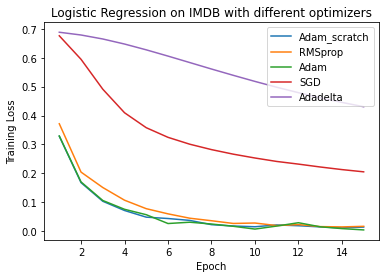

In [16]:
# Plotting losses
Xval = np.arange(1, 16)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("Logistic Regression on IMDB with different optimizers")  # add title

for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()

### Accuracy and Result

In [17]:
# Making Predictions for testing data

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam",
          loss = losses.binary_crossentropy,
            metrics = [metrics.binary_accuracy])

history = model.fit(partial_X_train,
            partial_y_train,
            epochs=15,
            batch_size=100,
            validation_data=(X_val, y_val))


np.set_printoptions(suppress=True)
result = model.predict(X_test)

Epoch 1/15
200/200 [==============================] - 3s 12ms/step - loss: 0.3820 - binary_accuracy: 0.8458 - val_loss: 0.2790 - val_binary_accuracy: 0.8898
Epoch 2/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1920 - binary_accuracy: 0.9301 - val_loss: 0.2955 - val_binary_accuracy: 0.8822
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1298 - binary_accuracy: 0.9539 - val_loss: 0.3321 - val_binary_accuracy: 0.8812
Epoch 4/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0908 - binary_accuracy: 0.9697 - val_loss: 0.4050 - val_binary_accuracy: 0.8754
Epoch 5/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0604 - binary_accuracy: 0.9811 - val_loss: 0.4686 - val_binary_accuracy: 0.8728
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0419 - binary_accuracy: 0.9873 - val_loss: 0.5620 - val_binary_accuracy: 0.8664
Epoch 7/15
200/200 [==============================] - 2s 1

In [18]:
result

array([[0.0001216 ],
       [1.        ],
       [0.00460193],
       ...,
       [0.00137717],
       [0.00022405],
       [0.9893485 ]], dtype=float32)

In [19]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [20]:
from sklearn.metrics import mean_absolute_error,accuracy_score
print("Mean Absolute Error :", mean_absolute_error(y_pred, y_test))
print("Accuracy :",100*(accuracy_score(y_test, y_pred)))

Mean Absolute Error : 0.149
Accuracy : 85.1
